In [77]:
# import required modules
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Flatten
from keras.losses import CategoricalCrossentropy, KLDivergence
from keras.metrics import Accuracy
from keras.optimizers import Adam
from matplotlib import pyplot

In [78]:
# load dataset and encode dataset
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [79]:
# normalize data for using it inside model
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
# normalize to range 0-1
train_x = train_x / 255.0
test_x = test_x / 255.0

In [106]:
# create early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss')

In [103]:
# define very simple cnn 
simple_model = Sequential()
simple_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
simple_model.add(MaxPooling2D((2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
simple_model.add(Dense(10, activation='softmax'))    
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
# train our simple model
simple_model_history = simple_model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x, test_y), verbose=1)

Epoch 1/100
782/782 [==============================] - 3s 4ms/step - loss: 1.2510 - accuracy: 0.5526 - val_loss: 1.2458 - val_accuracy: 0.5520
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 1.1809 - accuracy: 0.5779 - val_loss: 1.2424 - val_accuracy: 0.5577
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 1.1231 - accuracy: 0.5989 - val_loss: 1.1591 - val_accuracy: 0.5891
Epoch 4/100
782/782 [==============================] - 3s 4ms/step - loss: 1.0857 - accuracy: 0.6119 - val_loss: 1.1550 - val_accuracy: 0.5901
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 1.0435 - accuracy: 0.6261 - val_loss: 1.1865 - val_accuracy: 0.5715
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 1.0165 - accuracy: 0.6375 - val_loss: 1.1202 - val_accuracy: 0.6039
Epoch 7/100
782/782 [==============================] - 3s 4ms/step - loss: 0.9829 - accuracy: 0.6511 - val_loss: 1.0857 - val_accuracy: 0.6142

In [108]:
# find our simple model accuracy
_, simple_model_acc = simple_model.evaluate(test_x, test_y, verbose=1)
print('> %.3f' % (simple_model_acc * 100.0))

313/313 [==============================] - 1s 2ms/step - loss: 2.5474 - accuracy: 0.5775
> 57.750


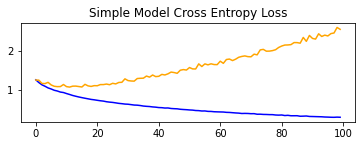

In [109]:
# plot our simple model cross entropy loss
pyplot.subplot(211)
pyplot.title('Simple Model Cross Entropy Loss')
pyplot.plot(simple_model_history.history['loss'], color='blue', label='train')
pyplot.plot(simple_model_history.history['val_loss'], color='orange', label='test')

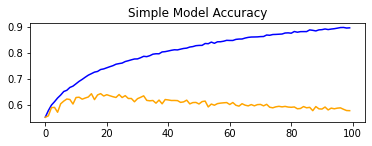

In [110]:
# plot our simple model accuracy
pyplot.subplot(212)
pyplot.title('Simple Model Accuracy')
pyplot.plot(simple_model_history.history['accuracy'], color='blue', label='train')
pyplot.plot(simple_model_history.history['val_accuracy'], color='orange', label='test')

In [111]:
# define simple vgg style cnn with one vgg block
vgg1_model = Sequential()
# first vgg block
vgg1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
vgg1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg1_model.add(MaxPooling2D((2, 2)))

vgg1_model.add(Flatten())
vgg1_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
vgg1_model.add(Dense(10, activation='softmax'))
vgg1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
# train our vgg1 model
vgg1_model_history = vgg1_model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x, test_y), verbose=1)

Epoch 1/100
782/782 [==============================] - 5s 5ms/step - loss: 1.7662 - accuracy: 0.3903 - val_loss: 1.1216 - val_accuracy: 0.6045
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.0281 - accuracy: 0.6411 - val_loss: 0.9927 - val_accuracy: 0.6567
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8488 - accuracy: 0.7051 - val_loss: 0.9238 - val_accuracy: 0.6774
Epoch 4/100
782/782 [==============================] - 4s 4ms/step - loss: 0.7286 - accuracy: 0.7459 - val_loss: 0.9455 - val_accuracy: 0.6741
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6122 - accuracy: 0.7886 - val_loss: 0.9672 - val_accuracy: 0.6834
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5158 - accuracy: 0.8220 - val_loss: 1.0263 - val_accuracy: 0.6753
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.4275 - accuracy: 0.8555 - val_loss: 1.0741 - val_accuracy: 0.6733

In [113]:
# find our vgg1 model accuracy
_, vgg1_model_acc = vgg1_model.evaluate(test_x, test_y, verbose=1)
print('> %.3f' % (vgg1_model_acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 6.0160 - accuracy: 0.6513
> 65.130


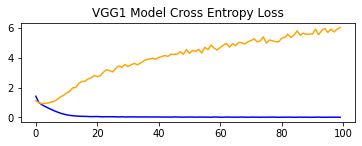

In [114]:
# plot our vgg1 model cross entropy loss
pyplot.subplot(211)
pyplot.title('VGG1 Model Cross Entropy Loss')
pyplot.plot(vgg1_model_history.history['loss'], color='blue', label='train')
pyplot.plot(vgg1_model_history.history['val_loss'], color='orange', label='test')

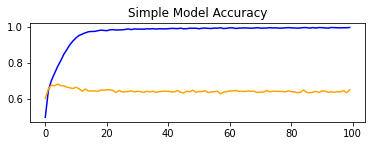

In [115]:
# plot our vgg1 model accuracy
pyplot.subplot(212)
pyplot.title('Simple Model Accuracy')
pyplot.plot(vgg1_model_history.history['accuracy'], color='blue', label='train')
pyplot.plot(vgg1_model_history.history['val_accuracy'], color='orange', label='test')

In [116]:
# define simple vgg style cnn with two vgg block
vgg2_model = Sequential()
# first vgg block
vgg2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
vgg2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_model.add(MaxPooling2D((2, 2)))
# second vgg block
vgg2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_model.add(MaxPooling2D((2, 2)))

vgg2_model.add(Flatten())
vgg2_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
vgg2_model.add(Dense(10, activation='softmax'))
vgg2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train our vgg1 model
vgg2_model_history = vgg2_model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x, test_y), verbose=1)

Epoch 1/100
782/782 [==============================] - 5s 6ms/step - loss: 1.6239 - accuracy: 0.4111 - val_loss: 1.0972 - val_accuracy: 0.6087
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.0328 - accuracy: 0.6370 - val_loss: 0.9292 - val_accuracy: 0.6728
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8403 - accuracy: 0.7054 - val_loss: 0.9099 - val_accuracy: 0.6869
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.7139 - accuracy: 0.7489 - val_loss: 0.8769 - val_accuracy: 0.6990
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6174 - accuracy: 0.7819 - val_loss: 0.8103 - val_accuracy: 0.7221
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5375 - accuracy: 0.8122 - val_loss: 0.8301 - val_accuracy: 0.7273
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.4523 - accuracy: 0.8393 - val_loss: 0.9033 - val_accuracy: 0.7140

In [118]:
# find our vgg2 model accuracy
_, vgg2_model_acc = vgg2_model.evaluate(test_x, test_y, verbose=1)
print('> %.3f' % (vgg2_model_acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 3.9766 - accuracy: 0.7072
> 70.720


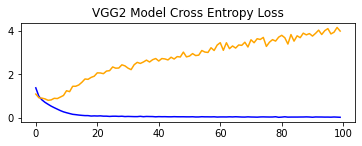

In [119]:
# plot our vgg2 model cross entropy loss
pyplot.subplot(211)
pyplot.title('VGG2 Model Cross Entropy Loss')
pyplot.plot(vgg2_model_history.history['loss'], color='blue', label='train')
pyplot.plot(vgg2_model_history.history['val_loss'], color='orange', label='test')

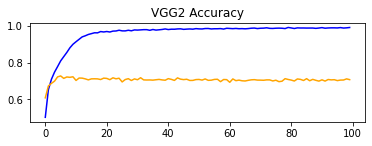

In [120]:
# plot our vgg2 model accuracy
pyplot.subplot(212)
pyplot.title('VGG2 Accuracy')
pyplot.plot(vgg2_model_history.history['accuracy'], color='blue', label='train')
pyplot.plot(vgg2_model_history.history['val_accuracy'], color='orange', label='test')

In [121]:
# define vgg2 with dropout
vgg2_dropout_model = Sequential()
# first vgg block
vgg2_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
vgg2_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_dropout_model.add(MaxPooling2D((2, 2)))
vgg2_dropout_model.add(Dropout(0.2))
# second vgg block
vgg2_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_dropout_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vgg2_dropout_model.add(MaxPooling2D((2, 2)))
vgg2_dropout_model.add(Dropout(0.2))

vgg2_dropout_model.add(Flatten())
vgg2_dropout_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
vgg2_dropout_model.add(Dense(10, activation='softmax'))
vgg2_dropout_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
# train our vgg2 with dropout model
vgg2_dropout_model_history = vgg2_dropout_model.fit(train_x, train_y, epochs=100, batch_size=64, validation_data=(test_x, test_y), verbose=1)

Epoch 1/100
782/782 [==============================] - 5s 6ms/step - loss: 1.8330 - accuracy: 0.3423 - val_loss: 1.1590 - val_accuracy: 0.5939
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1420 - accuracy: 0.5948 - val_loss: 0.9736 - val_accuracy: 0.6573
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.9457 - accuracy: 0.6655 - val_loss: 0.8870 - val_accuracy: 0.6876
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8279 - accuracy: 0.7051 - val_loss: 0.8544 - val_accuracy: 0.7029
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.7604 - accuracy: 0.7316 - val_loss: 0.8006 - val_accuracy: 0.7188
Epoch 6/100
782/782 [==============================] - 4s 6ms/step - loss: 0.6933 - accuracy: 0.7556 - val_loss: 0.7429 - val_accuracy: 0.7377
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.6440 - accuracy: 0.7694 - val_loss: 0.7602 - val_accuracy: 0.7364

In [123]:
# find our vgg2 with dropout model accuracy
_, vgg2_dropout_model_acc = vgg2_dropout_model.evaluate(test_x, test_y, verbose=1)
print('> %.3f' % (vgg2_dropout_model_acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 1.2751 - accuracy: 0.7590
> 75.900


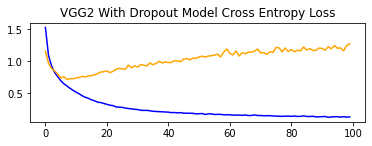

In [124]:
# plot our vgg2 dropout model cross entropy loss
pyplot.subplot(211)
pyplot.title('VGG2 With Dropout Model Cross Entropy Loss')
pyplot.plot(vgg2_dropout_model_history.history['loss'], color='blue', label='train')
pyplot.plot(vgg2_dropout_model_history.history['val_loss'], color='orange', label='test')

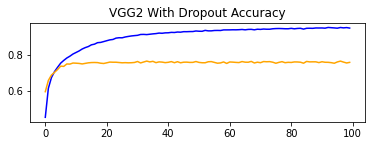

In [125]:
# plot our vgg2 dropout model accuracy
pyplot.subplot(212)
pyplot.title('VGG2 With Dropout Accuracy')
pyplot.plot(vgg2_dropout_model_history.history['accuracy'], color='blue', label='train')
pyplot.plot(vgg2_dropout_model_history.history['val_accuracy'], color='orange', label='test')

In [126]:
# define very simple cnn 
student_model = Sequential()
student_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
student_model.add(MaxPooling2D((2, 2)))
student_model.add(Flatten())
student_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
student_model.add(Dense(10, activation='softmax'))

In [127]:
import tensorflow as tf
class KnowledgeDistiller(Model):
    def __init__(self, student, teacher):
        super(KnowledgeDistiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(KnowledgeDistiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [128]:
from keras.metrics import Accuracy
from keras.losses import CategoricalCrossentropy, KLDivergence
distiller = KnowledgeDistiller(student=student_model, teacher=vgg2_dropout_model)
distiller.compile(
    optimizer=Adam(),
    metrics=[Accuracy()],
    student_loss_fn=CategoricalCrossentropy(),
    distillation_loss_fn=KLDivergence(),
    alpha=0.1,
    temperature=10,
)

In [131]:
# Distill teacher (vgg2_dropout) to student (simple model)
distiller_history = distiller.fit(train_x, train_y, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.9574 - distillation_loss: 2.2749e-04
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.9010 - distillation_loss: 2.1439e-04
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.8458 - distillation_loss: 2.0249e-04
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.8002 - distillation_loss: 1.9182e-04
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.7591 - distillation_loss: 1.8261e-04
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.7234 - distillation_loss: 1.7482e-04
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - accuracy: 0.0000e+00 - student_loss: 0.6874 - distilla

In [132]:
# Evaluate student on test dataset
_, student_acc = distiller.evaluate(test_x, test_y)
print('> %.3f' % (student_acc * 100.0))

313/313 [==============================] - 1s 2ms/step - accuracy: 1.0000e-05 - student_loss: 1.1510
> 60.112
